# Lab 1: Revision of Jupyter Notebooks & NumPy and an Introduction to Scikit-learn

This lab assumes you have used Python and Jupyter Notebooks before and offers a recap of some of the basics and key libraries (such as NumPy and Matplotlib) as well as introducing scikit-learn, a popular machine learning library. For a refresher on Python, see the [Introduction to Python lab](https://github.com/UoB-COMS21202/lab_sheets_public/tree/master/lab_1) or the University of Bristol [Beginning Python](https://milliams.gitlab.io/beginning_python/) course.

We strongly encourage you to use Python 3 as opposed to Python 2. Specifically Python 3.6 or newer is recommended.

The following libraries will be used throughout the unit:

- [NumPy](http://docs.scipy.org/doc/numpy/index.html), for scientific computation
- [Pandas](https://pandas.pydata.org/docs/reference/index.html), for data analysis
- [Matplotlib](http://matplotlib.org/contents.html), to plot any kind of data
- [Scikit-learn](https://scikit-learn.org/stable/user_guide.html), for machine learning

The libraries above have complete and very good documentation which can be used to learn other features of the libraries or for questions and examples. The documentation is available either online (links above) or via Python itself, e.g. `help(numpy.array)` in the Python interpreter.

The following libraries are required for this lab so make sure these are installed using pip3 or Anaconda (recommended to use a virtual environment):
- numpy
- pandas
- matplotlib
- seaborn
- scikit-learn
- scikit-image

For example, to install scikit-learn in a new conda environment, run
```
$ conda create -n COMS30035_labs
$ conda activate COMS30035_labs 
$ conda install scikit-learn
```
For further help see the installation guides on the libraries documentation.

## Jupyter Notebook

This modules labs will be run on [Jupyter Notebook](http://jupyter.org/), an interactive coding environments embedded in a webpage supporting various programing languages (Python, R, Lua, etc.) through the concept of kernels.  

It allows you to enrich your code with complex comments formatted in Markdown and $\LaTeX$, as well as to place the results of your computation right below your code.

Notebooks are organised in cells which can contain either code (in our case, this will be Python code) or text, which can be easily and nicely formatted using the Markdown notation. 

To edit an already existing cell simply double-click on it. You can use the toolbar to insert new cells, edit and delete them (or use keyboard shortcuts which are very handy to speed up coding). 

Cells can be run, by hitting `shift+enter` when editing a cell or by clicking on the `Run` button at the top. Running a Markdown cell will simply display the formatted text, while running a code cell will execute the commands executed in it. 

**Note**: when you run a code cell, all the created variables, implemented functions and imported libraries will be then available to every other code cell. However, it is commonly assumed that cells will be run sequentially in terms of prerequisites. To reset all variables and functions (for debugging) simply click `Kernel > Restart` from the Jupyter menu.

#### A bit on Markdown language (and a bit of LaTeX and HTML) if you're interested 

Markdown cells allow you to write fancy and simple comments: all of this is written in Markdown - double click on this cell to see the source. Introduction to Markdown syntax can be found [here](https://daringfireball.net/projects/markdown/syntax).

As Markdown is translated to HTML upon displaying it also allows you to use pure HTML: more details are available [here](https://daringfireball.net/projects/markdown/syntax#html).

Finally, you can also display simple $\LaTeX$ equations in Markdown thanks to `MathJax` support. For inline equations wrap your equation between `$` symbols; for display mode equations use `$$`.

## Importing the libraries

Before we start this lab we need to import the aforementioned libraries, using the `import` keyword and bind the libraries to the `np`, `pd` and `plt` etc namespaces with the `as` keyword.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from skimage import io
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 1) NumPy 

NumPy is designed for scientific computing. NumPy defines its own multidimensional array which can be created with:

``` Python
np.array([[1, 2], [3, 4], [5, 6]])
```
- For more details, type `help(np.array)` in your Python console or visit online help [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html). 

#### 1.1) Array operations

create two arrays, `A` and `B`:

``` Python
A = np.array([[2, 3], [4, -1], [5, 6]])
B = np.array([[5, 2], [8, 9], [2, 1]])
```

and perform the following operations, printing the array C:

- $C = 3A$
- $C = A + B$
- $C = AB^T$ (dot product or inner product)
- $C = A \odot B$ (Hadamard product or elementwise product)

In [5]:
# write your code here

A = np.array([[2, 3], [4, -1], [5, 6]])
B = np.array([[5, 2], [8, 9], [2, 1]])

C = 3 * A
print('C1:')
print(C)

C = A + B
print('C2:')
print(C)

C = np.dot(A, B.T)
print('C3:')
print(C)

C = np.multiply(A, B)
print('C4:')
print(C)

C1:
[[ 6  9]
 [12 -3]
 [15 18]]
C2:
[[ 7  5]
 [12  8]
 [ 7  7]]
C3:
[[16 43  7]
 [18 23  7]
 [37 94 16]]
C4:
[[10  6]
 [32 -9]
 [10  6]]


#### 1.2) More array operations

Calculate now the *sum*, *mean*, and *variance* of the matrix `A`, using `NumPy` functions/array properties `mean`, `sum`, `var`.

Hint: `help(np.sum)` or look [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html).  
Hint: `help(np.mean)` or look [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html).  
Hint: `help(np.var)` or look [here](http://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html#numpy.var).

Afterwards, calculate the *sum* of the rows and then the columns of `A`. Hint, specify the parameter `axis`.

In [11]:
# write your code here
print(np.sum(A))
print(np.mean(A))
print(np.var(A))

print('columns ',np.sum(A,axis=0))
print('rows ',np.sum(A,axis=1))

19
3.16666666667
5.13888888889
columns  [11  8]
rows  [ 5  3 11]


#### 1.3) Implement the sigmoid function using numpy. 

The sigmoid function is a non-linear function used in machine learning (logistic regression) and also deep learning (as an activation function). 

$$sigmoid(x) = \frac{1}{1+e^{-x}}$$

where $x$ could now be either a real number, a vector, or a matrix.

Implement the sigmoid function by defining a function called `sigmoid` which takes 1 argument $x$, a scalar or numpy array of any size and outputs the $sigmoid(x)$.

In [12]:
# write your code here
def sigmoid(x):
    return 1/(1 + np.exp(-x))

What is the sigmoid of the array:
``` Python
A = np.array([-5, 0, 5])
```
Plot the sigmoid curve for $ x \in [-5, 5] $. Hint, use numpy [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) or [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html).

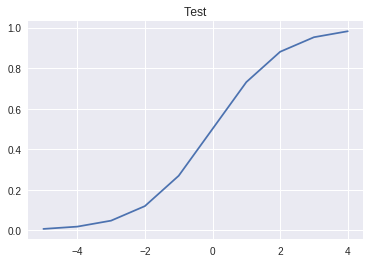

In [24]:
# write your code here
A2 = np.array([-5,0,5])
sigmoid(A2)

x = np.arange(-5,5);

fig, ax = plt.subplots(1,1)
ax.plot(x,sigmoid(x))
ax.set_title('Test')

#### 1.4) Standardise columns using numpy

A common technique used in machine learning is to standardise the data to ensure all features have values that lie on a comparable scale. Standardisation helps visualise data but also helps with convergence and to achieve high predictive performance for some machine learning algorithms.

To standardise a dataset we center the data by subtracting the mean of each feature, then scale by dividing by the standard deviation of the feature. Assuming the data is arranged with features in columns and training instances in rows, standardisation will result in each column vector of the data matrix having a mean of 0 and standard deviation of 1.

Implement a `standardiseCols(x)` function to standardise the columns of a numpy array.

Note, in Python you are able to perform mathematical operations between arrays of different shapes (such as substracting the row vector of means from a matrix) due to broadcasting, for more information read [here](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

In [57]:
# write your code here
def standardiseCols(x):
    for i in range(x.shape[1]):
        col = x[:,i]
        print(np.mean(col)," ",np.std(col))
        x[:,i] = np.divide(col - np.mean(col),np.std(col))
    return x

Standardise the columns of the array below by calling the `standardiseCols(x)` function:
``` Python
x = np.array([
    [0, 3, 5],
    [1, 6, 4],
    [3, -2, 8],
    [-1, 1, 10]
])
```
Print the mean and standard deviation of the columns of the standardised array.

In [59]:
# write your code here
x2 = np.array([
    [0, 3, 5],
    [1, 6, 4],
    [3, -2, 8],
    [-1, 1, 10]
],dtype=float)
standardiseCols(x2)

0.75   1.47901994577
2.0   2.91547594742
6.75   2.38484800354


array([[-0.50709255,  0.34299717, -0.73379939],
       [ 0.16903085,  1.37198868, -1.15311332],
       [ 1.52127766, -1.37198868,  0.52414242],
       [-1.18321596, -0.34299717,  1.36277029]])

#### 1.5) Reshaping numpy arrays 

The attribute [np.shape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) and function [np.reshape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) are commonly used in machine learning:
- X.shape is used to get the shape (dimension) of a matrix/vector X. 
- X.reshape(...) is used to create a new array containing the elements of X with the provided shape. 

For example, in computer vision, an image is represented by a 3D array of shape $(length, height, colour)$ where the colour represents the three RGB (red, green, blue) channels. Lets first load and plot the image. In order for the image to be given as an input into a machine learning algorithm, the 3D array needs to be reshaped to a vector of shape $(length*height*3, 1)$, that's your task below.

(900, 1440, 3)

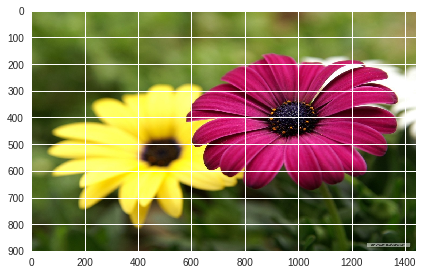

In [60]:
image = io.imread('flower.png')
io.imshow(image)
image.shape

Reshape the $image$ array to vector $v$ and print the shape of the created vector:

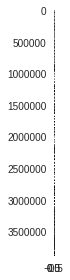

In [63]:
# write your code here
vector = image.reshape(image.shape[0]*image.shape[1]*3,1)
io.imshow(vector)

#### Note on array dimensions
The array $a$ below is a 1-dimensional array which has some slightly non-intuitive effects, such as the transpose is the same.

In [64]:
a = np.arange(5)
print(a)
print(a.shape)
print(a.T)
print(a.T.shape)

[0 1 2 3 4]
(5,)
[0 1 2 3 4]
(5,)


1-D arrays should be avoided and instead column or row vectors should be used which can be formed from 1-D arrays using reshape. Note the double square bracket.

The row vector of $a$ is:

In [65]:
a = a.reshape(1,-1)
print(a)
a.shape

[[0 1 2 3 4]]


(1, 5)

The column vector of $a$ is:

In [66]:
a = a.reshape(-1,1)
print(a)
a.shape

[[0]
 [1]
 [2]
 [3]
 [4]]


(5, 1)

You can check the dimensions are what you want by using the assert command:

In [67]:
assert(a.shape == (5,1))

#### Note on function and object property
As Python is an object oriented language, the difference between *function* and *object property* should be understood.  
An object instance, e.g. NumPy array `A = np.array([[1, 2], [3, 4], [5, 6]])` inherits all the functions from the class `numpy.ndarray`. Therefore, to sum all elements of array `A` we can choose two approaches:

- `A.sum()`, or
- `np.sum(A)`.

the first one is advisable.

Moreover, some objects have *properties* (e.g. shape of an array). Instead of calling the shape *function*, an array object has the shape *property*, i.e.:

- `A.shape`
- `np.shape(A)`

the first one is advisable.

## 2) Scikit-learn
Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It provides various tools for model fitting, data preprocessing, model selection and evaluation as well as many other utilities. The exercises takes you through a very simple workflow for training and evaluating machine learning models.

### Scikit-learn basics

#### 2.1) Datasets
Scikit-learn can be used to import [datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) using the dataset loader to load small standard, or 'toy', datasets (such as iris classification or boston house pricing) or the  dataset fetcher to download and load larger dataset from the ‘real world’.

Firstly, load the Boston dataset and print the number of examples and features and feature names in the dataset. Note, [load_boston](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) has already been imported from sklearn.datasets. 

Then using seaborn create a [pairplot](https://seaborn.pydata.org/tutorial/axis_grids.html) (or scatterplot matrix) to show feature joint relationships and individual feature distributions. Note, the data must be in a pandas dataframe.

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)


AttributeError: module 'seaborn' has no attribute 'scatterplot'

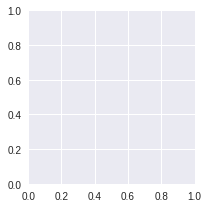

In [93]:
# write your code here
boston = load_boston()
print(boston.keys())
print(boston.feature_names)
print(boston.data.shape)

pandaFrame = pd.DataFrame(boston.data,columns=boston.feature_names)

g = sns.FacetGrid(pandaFrame)
g.map(sns.scatterplot, "RAD", "TAX")

Pairplots are a quick and effective way to perform exploratory data analysis (EDA) to find patterns, relationships and anomalies to guide subsequent analysis. A pairplot allows us to see both the distribution of single variables and relationships between two variables. As you can see above, a pairplot of 14 features is crowded and difficult to interpret.

If you were wondering, the feature names abbreviations stand for:   
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per \$10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    \% lower status of the population

The target variable MEDV is Median value of owner-occupied homes in $1000's.

#### 2.2) Preprossing
The scikit-learn has a [preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) package which provides several common functions to change the raw data into something more suitable for the machine learning algorithm. In general, learning algorithms benefit from standardisation of the dataset or if some outliers are present then robust scalers or transformers are more appropriate.

Standardise the Boston training dataset loaded in the previous exercise using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler). Check the features have zero mean and unit variance/standard deviation.

In [121]:
# write your code here
boston = load_boston()
scaler = StandardScaler()
scaler.fit(boston.data)
stan = scaler.transform(boston.data)
print(stan)
print(np.mean(stan))
print(np.std(stan))

[[-0.41771335  0.28482986 -1.2879095  ..., -1.45900038  0.44105193
  -1.0755623 ]
 [-0.41526932 -0.48772236 -0.59338101 ..., -0.30309415  0.44105193
  -0.49243937]
 [-0.41527165 -0.48772236 -0.59338101 ..., -0.30309415  0.39642699
  -1.2087274 ]
 ..., 
 [-0.41137448 -0.48772236  0.11573841 ...,  1.17646583  0.44105193
  -0.98304761]
 [-0.40568883 -0.48772236  0.11573841 ...,  1.17646583  0.4032249
  -0.86530163]
 [-0.41292893 -0.48772236  0.11573841 ...,  1.17646583  0.44105193
  -0.66905833]]
-1.12338772452e-15
1.0


#### 2.3) Train test split
Training and evaluating a model on the same dataset will lead to overfitting and poor performance on unseen data. To measure the generalisation ability of a model, it is common practice to hold out part of the available data as a test set. Scikit-learn provides a [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) function which performs a random split into training and testing sets.

When evaluating different hyperparameters for machine learning models then there is still a risk of overfitting on the test set because the parameters can be tweaked until the model performs optimally. To solve this problem, yet another part of the dataset can be held out as a so-called validation set which is used for evaluating hyperparameter values before final evaluation can be done on the test set. However, this can drastically reduce the number of samples which can be used for model training and the performance depends on the training and validation splits. To get round this problem cross-validation can be used which trains multiple models on "folds" of the training set, read about cross-validation in scikit-learn [here](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation).

Your task is to split the Boston (scaled) training data set so 70% of the data is for training and the remaining 30% to test.

How many training examples are there in the training and test sets?

Should the `random_state` parameter be specified for the `train_test_split` function?

In [125]:
# write your code here
xtrain, xtest = train_test_split(boston.data,test_size=0.3,random_state=1)
print(train.shape)
print(test.shape)

(354, 13)
(152, 13)


#### 2.4) Model fitting
Scikit-learn provides many built-in machine learning algorithms and models, called estimators. An estimator is any object that learns from data; it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data. Each estimator can be fitted to some data using its fit method, as was done on the previous exercise to standardise the raw data.

Fit a simple [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model to the training data from the train-test split.

Print the linear model coefficients. 

In [160]:
# write your code here
print(train[:,range(0,1)].shape)
print(train[:,range(2,3)].reshape(1,-1).shape)
reg = LinearRegression().fit(train[:,range(0,1)],train[:,range(2,3)])
print(reg.coef_," ",reg.intercept_)

(354, 1)
(1, 354)
[[ 0.41712743]]   [ 0.01872566]


#### 2.5) Model evauluation
Scikit-learn supports simple and quick evaluation of machine learning models using the [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module which quantifies the quality of predictions.

Calculate the root mean squared error (RMSE) of both the training and test sets for the linear model. Is the model overfitting?

Also, plot the model predictions on a [scatter plot](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.scatter.html?highlight=scatter#matplotlib.pyplot.scatter) alongside the real values for the test data. All the data points would lie on a diagonal (prediction = real) if the model was 100% accurate.

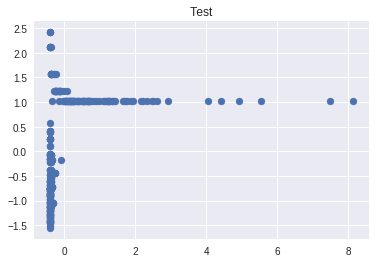

In [162]:
# write your code here
fig, ax = plt.subplots(1,1)
ax.scatter(train[:,range(0,1)],train[:,range(2,3)])
ax.set_title('Test')

This lab provides some very basics of scikit-learn, more to come in future labs!

## Wrap up

That's it for lab 1, a revision of Jupyter Notebooks and NumPy as well as an introduction to Scikit-learn. We have covered:
- The interactive coding environment of Jupyter Notebooks which allows Markdown and $\LaTeX$ to be added to code. Notebooks show the results of your computation right below your code which is great for quick coding experiments and debugging. These features allow Notebooks to be used to create human-readable documents containing visualiations of results and analysis.
- The NumPy package performing a range of array operations, standardised the columns of an array and reshaped an image array into a column vector.
- The  machine learning library Scikit-learn which can be used to import datasets, perform data preprocessing and then train and evaluate models. We went through a basic machine learning pipeline with the Boston housing dataset.

### References
- COMS30035 Machine Learning lecture notes 1.

#### Materials used to create the lab
- University of Bristol's Symbols, Patterns and Signals course
- Andrew Ng's Neural Networks and Deep Learning course on Coursera